In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

warnings.filterwarnings("ignore")

# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 

y.loc[:, 'class'] = le.fit_transform(y['class'])

y = pd.DataFrame(y, columns=["class"])
y = y.astype(int)

In [2]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [3]:
y.head()

,class
0,2
1,2
2,2
3,2
4,2


In [4]:
X.shape

(1728, 6)

In [5]:
y.shape

(1728, 1)

In [6]:
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [7]:
y.describe()

,class
count,1728.000000
mean,1.553241
std,0.875948
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


In [8]:
X.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [9]:
y.isnull().sum()

class    0
dtype: int64

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to pd.Categorical
for col in cats:
   X[col] = X[col].astype('category')

In [11]:
X.dtypes

buying      category
maint       category
doors       category
persons     category
lug_boot    category
safety      category
dtype: object

In [12]:
y.dtypes

class    int32
dtype: object

In [13]:
print(np.unique(y))

[0 1 2 3]


In [14]:
# Split the data into 70% train, 15% validation, and 15% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [15]:
X_train.shape, X_val.shape, X_test.shape

((1209, 6), (259, 6), (260, 6))

In [16]:
import xgboost as xgb

# Create regression matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)
dval_clf = xgb.DMatrix(X_val, y_valid, enable_categorical=True)

In [17]:
# Define hyperparameters to tune
hyperparameters_to_tune = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.001, 0.01, 0.1, 0.3],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0, 0.1, 0.2, 0,3],
}

# Use Grid Search or Random Search to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier(objective="multi:softprob", tree_method="gpu_hist", enable_categorical = True)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=hyperparameters_to_tune, cv=5, scoring="accuracy")
grid_search.fit(X_val, y_valid)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3}


In [18]:
# Train the model with the best parameters
best_model = xgb.XGBClassifier(objective="multi:softprob", tree_method="gpu_hist", **best_params, enable_categorical = True)
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

y_pred



array([2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0], dtype=int64)

In [25]:
np.array(y_test1.flatten()) 

array([2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 3, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 0, 0, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       2, 0, 2, 1, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0])

In [26]:
accuracy = np.mean(y_pred == y_test1.flatten())
print("Accuracy:", accuracy)


Accuracy: 0.9769230769230769


In [56]:
y_test_values_reshaped = y_test.values.flatten()


In [57]:
confusion_matrix = np.zeros((len(np.unique(y_test.values)), len(np.unique(y_test.values))))
for i in range(len(y_test)):
    confusion_matrix[y_test.values[i], y_pred[i]] += 1
print("Confusion Matrix:")
print(confusion_matrix)

precision = np.zeros(len(np.unique(y_test_values_reshaped)))
recall = np.zeros(len(np.unique(y_test_values_reshaped)))
f_score = np.zeros(len(np.unique(y_test_values_reshaped)))
for i in range(len(np.unique(y_test_values_reshaped))):
    true_positive = confusion_matrix[i, i]
    false_positive = np.sum(confusion_matrix[:, i]) - true_positive
    false_negative = np.sum(confusion_matrix[i, :]) - true_positive
    precision[i] = true_positive / (true_positive + false_positive)
    recall[i] = true_positive / (true_positive + false_negative)
    f_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

precision_recall_curve = []
for threshold in np.linspace(0, 1, 100):
    y_pred_thresh = y_pred >= threshold
    true_positive = np.sum(y_pred_thresh[y_test_values_reshaped == 1])
    false_positive = np.sum(y_pred_thresh[y_test_values_reshaped == 0])
    false_negative = np.sum(~y_pred_thresh[y_test_values_reshaped == 1])
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precision_recall_curve.append((precision, recall))
print("Precision-Recall Curve Points:", precision_recall_curve)




Confusion Matrix:
[[ 57.   0.   0.   0.]
 [  2.   7.   0.   0.]
 [  4.   0. 182.   0.]
 [  0.   0.   0.   8.]]
Precision: [0.9047619 1.        1.        1.       ]
Recall: [1.         0.77777778 0.97849462 1.        ]
F-score: [0.95       0.875      0.98913043 1.        ]
Precision-Recall Curve Points: [(0.13636363636363635, 1.0), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.7777777777777778), (1.0, 0.77777777777

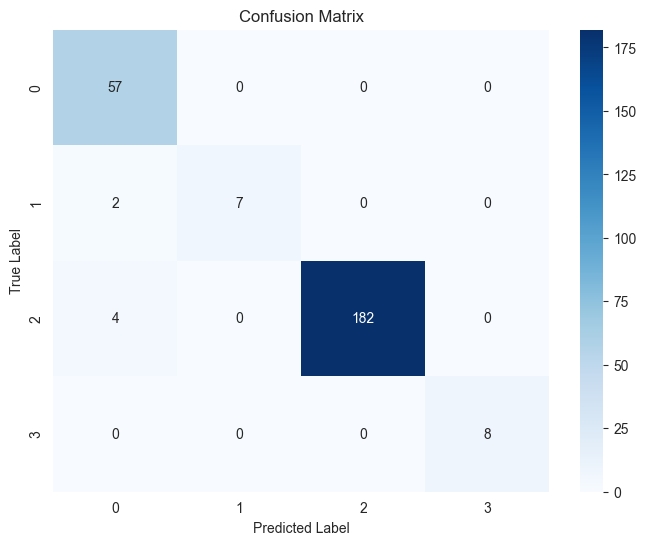

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".0f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [63]:
# Compute precision, recall, and F-score for each class
precision_per_class = []
recall_per_class = []
fscore_per_class = []

for class_label in np.unique(y_test_values_reshaped):
    true_positives = np.sum((y_test_values_reshaped == class_label) & (y_pred == class_label))
    false_positives = np.sum((y_test_values_reshaped != class_label) & (y_pred == class_label))
    false_negatives = np.sum((y_test_values_reshaped == class_label) & (y_pred != class_label))
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fscore = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    fscore_per_class.append(fscore)

# Compute average precision, recall, and F-score across all classes
average_precision = np.mean(precision_per_class)
average_recall = np.mean(recall_per_class)
average_fscore = np.mean(fscore_per_class)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F-score: {average_fscore}")

Average Precision: 0.9761904761904762
Average Recall: 0.9390681003584229
Average F-score: 0.9535326086956523
